Finite Difference Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

0.9999999810930511


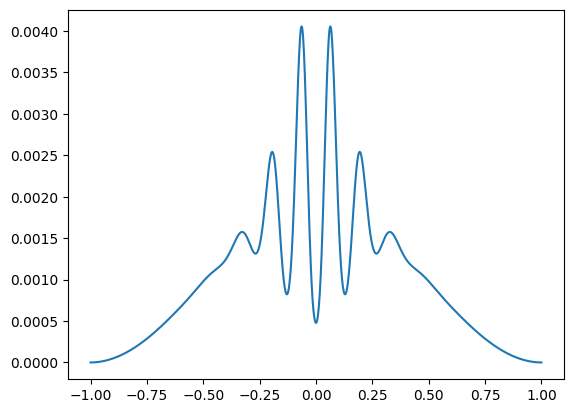

In [55]:
'''NOTES
 I don't super trust my matrix math, i'll show my equations once we're in class. But at the very least it 
 provides halfway(?) expected results. The alpha, beta, A are just constants I gathered up during the algebra.
 Similar with K and G, they just are V dependent so they're lambda functions.

 Also hbar and m are just totally felt by heart and soul, this doesn't really represent anything lmao
'''



i = np.imag(1j)
hbar = 2

m = 2

x = np.linspace(-1,1,1000)
dx = x[1]-x[0]

t = np.linspace(0,13.5,100)
dt = t[1]-t[0]


alpha = (i*dt)/(2*hbar)
beta = hbar/(2*m)


A = (alpha * beta) / dx**2

# V = -1e3 * x ** 2
V = np.zeros((len(x)))
V[0] = 500
V[-1] = 500

K =lambda x : (1 + 2*A + V[x] * alpha) / A
G = lambda x : (1 - 2*A - V[x] * alpha) / A


psi0 = np.exp(-(x**2)*100)

def MBarrs(solutions):
    diag_count = 0

    M = np.zeros((len(x),len(x)))
    B = np.zeros((len(x),))
    for i in range(len(x)):
        for j in range(len(x)):
            
            

            if i == j:
                M[i,j] = K (i)
                diag_count += 1

            elif (i == diag_count - 1) and (j == diag_count):
                M[i, j] = -1

            elif (i == diag_count) and j == (diag_count - 1):
                M[i, j] = -1
        
        if i > 1 and i < len(x) - 1:
            B[i] = solutions[i] * G(i) + solutions[i+1] + solutions[i-1]
        elif i == 0:
            B[i] = 0 #solutions[i] * G(i) + solutions[i+1]
        elif i == len(x):
            B[i] = 0 #solutions[i] * G(i) + solutions[i-1]
    return(M,B)

M1,B1 = MBarrs(psi0)

sols = np.linalg.solve(M1,B1)

for i in range(len(t)):
    Mx,Bx = MBarrs(sols)
    sols = np.linalg.solve(Mx,Bx)
    sols = sols / (np.sqrt(np.sum(sols**2)))

plt.plot(x,np.absolute(sols)**2)

print(np.trapz(np.absolute(sols)**2))

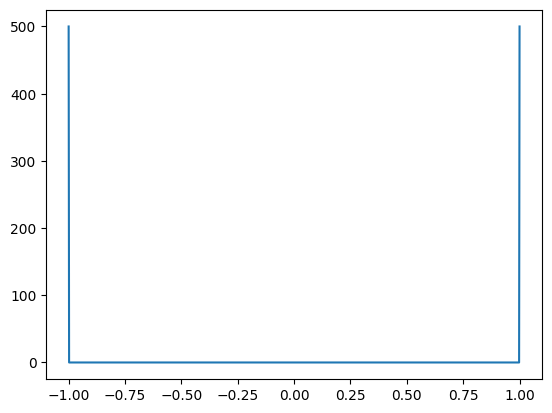

In [50]:
plt.plot(x,V)